# Home Run Modeling Notebook

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import glob
import tqdm
import datetime
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)

from scraper import BaseballReferenceScraper
from runner import Runner
from player import Player, PlayerMap

In [54]:
DATA_DIR = "./data/2022-2023"

## Download data

In [55]:
def download(start_date, end_date, remove=False):
    s = BaseballReferenceScraper(data_dir=DATA_DIR)

    if remove:
        wildcard = os.path.join(DATA_DIR, "*")
        s.log(f"Removing {wildcard}")
        for f in glob.glob(wildcard):
            os.remove(f)

    game_ids = s.get_game_ids(start_date, end_date)
    for game_id in game_ids:
        try:
            s.get_game_data(game_id)
        except:
            s.log("Error", error=True)
            continue

In [5]:
# download("4/2/17", "10/1/17", remove=True)  # Only include regular season

In [6]:
# download("4/7/22", "10/5/22", remove=True)  # Only include regular season

In [7]:
# yesterday_date = (pd.Timestamp.now() - pd.Timedelta("1 day")).strftime("%m/%d/%y")
# download("3/28/24", yesterday_date, remove=False)  # Only include regular season

## Analyze data

In [56]:
STAT_NAMES = ["Batting Average", "On-Base%", "Slugging %", "At Bats", "Home Runs", "Runs Batted In",\
              "Average Home Runs", "Average Runs Batted In", "At Bats Per Game", "details"]

In [57]:
r = Runner(STAT_NAMES, data_dir=DATA_DIR)
r.build_player_map_for_all_games(n=None)

[2024-04-15 20:53:04.167071] Simulating games
[2024-04-15 20:53:04.187243] 04/07/22 Chicago Cubs vs. Milwaukee Brewers
[2024-04-15 20:53:04.235310] 04/07/22 St. Louis Cardinals vs. Pittsburgh Pirates
[2024-04-15 20:53:04.275899] 04/07/22 Kansas City Royals vs. Cleveland Guardians
[2024-04-15 20:53:04.316632] 04/07/22 Arizona Diamondbacks vs. San Diego Padres
[2024-04-15 20:53:04.358615] 04/07/22 Washington Nationals vs. New York Mets
[2024-04-15 20:53:04.399669] 04/07/22 Atlanta Braves vs. Cincinnati Reds
[2024-04-15 20:53:04.442263] 04/07/22 Los Angeles Angels vs. Houston Astros
[2024-04-15 20:53:04.486265] 04/08/22 San Francisco Giants vs. Miami Marlins
[2024-04-15 20:53:04.541631] 04/08/22 Toronto Blue Jays vs. Texas Rangers
[2024-04-15 20:53:04.587056] 04/08/22 Philadelphia Phillies vs. Oakland Athletics
[2024-04-15 20:53:04.632078] 04/08/22 Detroit Tigers vs. Chicago White Sox
[2024-04-15 20:53:04.680430] 04/08/22 Minnesota Twins vs. Seattle Mariners
[2024-04-15 20:53:04.841948] 0

[2024-04-15 20:53:08.946935] 04/15/22 Pittsburgh Pirates vs. Washington Nationals
[2024-04-15 20:53:08.988248] 04/15/22 Kansas City Royals vs. Detroit Tigers
[2024-04-15 20:53:09.020519] 04/15/22 Toronto Blue Jays vs. Oakland Athletics
[2024-04-15 20:53:09.061341] 04/15/22 Boston Red Sox vs. Minnesota Twins
[2024-04-15 20:53:09.099394] 04/15/22 Texas Rangers vs. Los Angeles Angels
[2024-04-15 20:53:09.138257] 04/16/22 Toronto Blue Jays vs. Oakland Athletics
[2024-04-15 20:53:09.183991] 04/16/22 Boston Red Sox vs. Minnesota Twins
[2024-04-15 20:53:09.224515] 04/16/22 Texas Rangers vs. Los Angeles Angels
[2024-04-15 20:53:09.262696] 04/16/22 Kansas City Royals vs. Detroit Tigers
[2024-04-15 20:53:09.298120] 04/16/22 Baltimore Orioles vs. New York Yankees
[2024-04-15 20:53:09.332124] 04/16/22 Pittsburgh Pirates vs. Washington Nationals
[2024-04-15 20:53:09.369555] 04/16/22 Chicago White Sox vs. Tampa Bay Rays
[2024-04-15 20:53:09.428477] 04/16/22 Miami Marlins vs. Philadelphia Phillies
[2

[2024-04-15 20:53:13.227471] 04/23/22 Tampa Bay Rays vs. Boston Red Sox
[2024-04-15 20:53:13.271055] 04/23/22 Washington Nationals vs. San Francisco Giants
[2024-04-15 20:53:13.316759] 04/23/22 New York Yankees vs. Cleveland Guardians
[2024-04-15 20:53:13.354449] 04/23/22 Atlanta Braves vs. Miami Marlins
[2024-04-15 20:53:13.390458] 04/23/22 Los Angeles Angels vs. Baltimore Orioles
[2024-04-15 20:53:13.426212] 04/23/22 Detroit Tigers vs. Colorado Rockies
[2024-04-15 20:53:13.467737] 04/23/22 Detroit Tigers vs. Colorado Rockies
[2024-04-15 20:53:13.510410] 04/24/22 Los Angeles Angels vs. Baltimore Orioles
[2024-04-15 20:53:13.556684] 04/24/22 Atlanta Braves vs. Miami Marlins
[2024-04-15 20:53:13.597741] 04/24/22 New York Yankees vs. Cleveland Guardians
[2024-04-15 20:53:13.638839] 04/24/22 Tampa Bay Rays vs. Boston Red Sox
[2024-04-15 20:53:13.676568] 04/24/22 Cincinnati Reds vs. St. Louis Cardinals
[2024-04-15 20:53:13.711219] 04/24/22 Washington Nationals vs. San Francisco Giants
[202

[2024-04-15 20:53:17.524575] 05/01/22 Milwaukee Brewers vs. Chicago Cubs
[2024-04-15 20:53:17.568904] 05/01/22 Toronto Blue Jays vs. Houston Astros
[2024-04-15 20:53:17.605319] 05/01/22 Texas Rangers vs. Atlanta Braves
[2024-04-15 20:53:17.641514] 05/01/22 Kansas City Royals vs. New York Yankees
[2024-04-15 20:53:17.686780] 05/01/22 St. Louis Cardinals vs. Arizona Diamondbacks
[2024-04-15 20:53:17.724651] 05/02/22 St. Louis Cardinals vs. Kansas City Royals
[2024-04-15 20:53:17.762950] 05/02/22 Toronto Blue Jays vs. New York Yankees
[2024-04-15 20:53:17.800573] 05/02/22 Chicago White Sox vs. Los Angeles Angels
[2024-04-15 20:53:17.836633] 05/02/22 Miami Marlins vs. Arizona Diamondbacks
[2024-04-15 20:53:17.871372] 05/02/22 Oakland Athletics vs. Tampa Bay Rays
[2024-04-15 20:53:17.905210] 05/02/22 Baltimore Orioles vs. Minnesota Twins
[2024-04-15 20:53:17.941355] 05/02/22 Houston Astros vs. Seattle Mariners
[2024-04-15 20:53:17.975936] 05/02/22 New York Mets vs. Atlanta Braves
[2024-04-1

[2024-04-15 20:53:21.595980] 05/10/22 Atlanta Braves vs. Boston Red Sox
[2024-04-15 20:53:21.633978] 05/10/22 Los Angeles Angels vs. Tampa Bay Rays
[2024-04-15 20:53:21.674371] 05/10/22 Arizona Diamondbacks vs. Miami Marlins
[2024-04-15 20:53:21.708942] 05/10/22 San Diego Padres vs. Chicago Cubs
[2024-04-15 20:53:21.748385] 05/10/22 Washington Nationals vs. New York Mets
[2024-04-15 20:53:21.783650] 05/10/22 Cincinnati Reds vs. Milwaukee Brewers
[2024-04-15 20:53:21.819797] 05/10/22 Seattle Mariners vs. Philadelphia Phillies
[2024-04-15 20:53:21.856489] 05/10/22 Chicago White Sox vs. Cleveland Guardians
[2024-04-15 20:53:21.892169] 05/10/22 Pittsburgh Pirates vs. Los Angeles Dodgers
[2024-04-15 20:53:21.929915] 05/10/22 San Francisco Giants vs. Colorado Rockies
[2024-04-15 20:53:21.966901] 05/10/22 St. Louis Cardinals vs. Baltimore Orioles
[2024-04-15 20:53:22.001804] 05/10/22 Minnesota Twins vs. Houston Astros
[2024-04-15 20:53:22.035450] 05/10/22 Texas Rangers vs. Kansas City Royals


[2024-04-15 20:53:25.611778] 05/17/22 New York Mets vs. St. Louis Cardinals
[2024-04-15 20:53:25.651906] 05/17/22 Los Angeles Dodgers vs. Arizona Diamondbacks
[2024-04-15 20:53:25.689600] 05/17/22 Kansas City Royals vs. Chicago White Sox
[2024-04-15 20:53:25.726344] 05/17/22 New York Mets vs. St. Louis Cardinals
[2024-04-15 20:53:25.763828] 05/17/22 Los Angeles Dodgers vs. Arizona Diamondbacks
[2024-04-15 20:53:25.797276] 05/17/22 Kansas City Royals vs. Chicago White Sox
[2024-04-15 20:53:25.829673] 05/18/22 Miami Marlins vs. Washington Nationals
[2024-04-15 20:53:25.869650] 05/18/22 Milwaukee Brewers vs. Atlanta Braves
[2024-04-15 20:53:25.909959] 05/18/22 Oakland Athletics vs. Minnesota Twins
[2024-04-15 20:53:25.955134] 05/18/22 Baltimore Orioles vs. New York Yankees
[2024-04-15 20:53:25.989823] 05/18/22 Kansas City Royals vs. Chicago White Sox
[2024-04-15 20:53:26.022658] 05/18/22 Chicago Cubs vs. Pittsburgh Pirates
[2024-04-15 20:53:26.058141] 05/18/22 Toronto Blue Jays vs. Seattl

[2024-04-15 20:53:29.892346] 05/26/22 St. Louis Cardinals vs. Milwaukee Brewers
[2024-04-15 20:53:29.943115] 05/26/22 Minnesota Twins vs. Kansas City Royals
[2024-04-15 20:53:29.987505] 05/26/22 Chicago White Sox vs. Boston Red Sox
[2024-04-15 20:53:30.024703] 05/26/22 Oakland Athletics vs. Texas Rangers
[2024-04-15 20:53:30.063817] 05/26/22 Washington Nationals vs. Colorado Rockies
[2024-04-15 20:53:30.099059] 05/26/22 Tampa Bay Rays vs. New York Yankees
[2024-04-15 20:53:30.136233] 05/26/22 Cincinnati Reds vs. Chicago Cubs
[2024-04-15 20:53:30.181796] 05/26/22 Arizona Diamondbacks vs. Los Angeles Dodgers
[2024-04-15 20:53:30.222537] 05/26/22 Atlanta Braves vs. Philadelphia Phillies
[2024-04-15 20:53:30.256181] 05/26/22 Los Angeles Angels vs. Toronto Blue Jays
[2024-04-15 20:53:30.294088] 05/27/22 Boston Red Sox vs. Baltimore Orioles
[2024-04-15 20:53:30.329442] 05/27/22 St. Louis Cardinals vs. Milwaukee Brewers
[2024-04-15 20:53:30.366962] 05/27/22 Minnesota Twins vs. Kansas City Roy

[2024-04-15 20:53:33.998292] 06/02/22 New York Yankees vs. Los Angeles Angels
[2024-04-15 20:53:34.037355] 06/03/22 New York Yankees vs. Detroit Tigers
[2024-04-15 20:53:34.074438] 06/03/22 Los Angeles Dodgers vs. New York Mets
[2024-04-15 20:53:34.107118] 06/03/22 Cincinnati Reds vs. Washington Nationals
[2024-04-15 20:53:34.139156] 06/03/22 Tampa Bay Rays vs. Chicago White Sox
[2024-04-15 20:53:34.176742] 06/03/22 Colorado Rockies vs. Atlanta Braves
[2024-04-15 20:53:34.215168] 06/03/22 Miami Marlins vs. San Francisco Giants
[2024-04-15 20:53:34.271430] 06/03/22 Milwaukee Brewers vs. San Diego Padres
[2024-04-15 20:53:34.318459] 06/03/22 Oakland Athletics vs. Boston Red Sox
[2024-04-15 20:53:34.356084] 06/03/22 Baltimore Orioles vs. Cleveland Guardians
[2024-04-15 20:53:34.389817] 06/03/22 Pittsburgh Pirates vs. Arizona Diamondbacks
[2024-04-15 20:53:34.425510] 06/03/22 Kansas City Royals vs. Houston Astros
[2024-04-15 20:53:34.461761] 06/03/22 Chicago Cubs vs. St. Louis Cardinals
[2

[2024-04-15 20:53:38.231770] 06/11/22 Minnesota Twins vs. Tampa Bay Rays
[2024-04-15 20:53:38.287398] 06/11/22 Kansas City Royals vs. Baltimore Orioles
[2024-04-15 20:53:38.335103] 06/11/22 Philadelphia Phillies vs. Arizona Diamondbacks
[2024-04-15 20:53:38.377913] 06/11/22 Cleveland Guardians vs. Oakland Athletics
[2024-04-15 20:53:38.418531] 06/11/22 Seattle Mariners vs. Boston Red Sox
[2024-04-15 20:53:38.456005] 06/11/22 Chicago White Sox vs. Texas Rangers
[2024-04-15 20:53:38.499928] 06/11/22 San Francisco Giants vs. Los Angeles Dodgers
[2024-04-15 20:53:38.540301] 06/11/22 Houston Astros vs. Miami Marlins
[2024-04-15 20:53:38.579416] 06/11/22 Washington Nationals vs. Milwaukee Brewers
[2024-04-15 20:53:38.615092] 06/11/22 New York Yankees vs. Chicago Cubs
[2024-04-15 20:53:38.655452] 06/11/22 Atlanta Braves vs. Pittsburgh Pirates
[2024-04-15 20:53:38.689580] 06/11/22 Los Angeles Angels vs. New York Mets
[2024-04-15 20:53:38.734477] 06/11/22 San Diego Padres vs. Colorado Rockies
[

[2024-04-15 20:53:42.471050] 06/18/22 Seattle Mariners vs. Los Angeles Angels
[2024-04-15 20:53:42.515561] 06/19/22 New York Mets vs. Miami Marlins
[2024-04-15 20:53:42.552569] 06/19/22 Houston Astros vs. Chicago White Sox
[2024-04-15 20:53:42.590126] 06/19/22 Los Angeles Dodgers vs. Cleveland Guardians
[2024-04-15 20:53:42.627676] 06/19/22 Washington Nationals vs. Philadelphia Phillies
[2024-04-15 20:53:42.662619] 06/19/22 Colorado Rockies vs. San Diego Padres
[2024-04-15 20:53:42.698225] 06/19/22 Cincinnati Reds vs. Milwaukee Brewers
[2024-04-15 20:53:42.734915] 06/19/22 Arizona Diamondbacks vs. Minnesota Twins
[2024-04-15 20:53:42.770162] 06/19/22 Chicago Cubs vs. Atlanta Braves
[2024-04-15 20:53:42.802673] 06/19/22 Detroit Tigers vs. Texas Rangers
[2024-04-15 20:53:42.838832] 06/19/22 Toronto Blue Jays vs. New York Yankees
[2024-04-15 20:53:42.877108] 06/19/22 Boston Red Sox vs. St. Louis Cardinals
[2024-04-15 20:53:42.915198] 06/19/22 Seattle Mariners vs. Los Angeles Angels
[2024-

[2024-04-15 20:53:46.831499] 06/27/22 Washington Nationals vs. Pittsburgh Pirates
[2024-04-15 20:53:46.869196] 06/27/22 Colorado Rockies vs. Los Angeles Dodgers
[2024-04-15 20:53:46.901766] 06/27/22 Cleveland Guardians vs. Minnesota Twins
[2024-04-15 20:53:46.944053] 06/27/22 Seattle Mariners vs. Baltimore Orioles
[2024-04-15 20:53:46.980402] 06/27/22 Kansas City Royals vs. Texas Rangers
[2024-04-15 20:53:47.015033] 06/27/22 St. Louis Cardinals vs. Miami Marlins
[2024-04-15 20:53:47.057682] 06/27/22 Toronto Blue Jays vs. Boston Red Sox
[2024-04-15 20:53:47.096530] 06/28/22 Washington Nationals vs. Pittsburgh Pirates
[2024-04-15 20:53:47.137982] 06/28/22 Colorado Rockies vs. Los Angeles Dodgers
[2024-04-15 20:53:47.178347] 06/28/22 Tampa Bay Rays vs. Milwaukee Brewers
[2024-04-15 20:53:47.216639] 06/28/22 Arizona Diamondbacks vs. San Diego Padres
[2024-04-15 20:53:47.255655] 06/28/22 New York Mets vs. Houston Astros
[2024-04-15 20:53:47.305296] 06/28/22 Los Angeles Angels vs. Chicago Wh

[2024-04-15 20:53:51.156799] 07/05/22 Pittsburgh Pirates vs. New York Yankees
[2024-04-15 20:53:51.209945] 07/05/22 Baltimore Orioles vs. Texas Rangers
[2024-04-15 20:53:51.251824] 07/05/22 Oakland Athletics vs. Toronto Blue Jays
[2024-04-15 20:53:51.286159] 07/05/22 Milwaukee Brewers vs. Chicago Cubs
[2024-04-15 20:53:51.323565] 07/05/22 Miami Marlins vs. Los Angeles Angels
[2024-04-15 20:53:51.361559] 07/05/22 Chicago White Sox vs. Minnesota Twins
[2024-04-15 20:53:51.400472] 07/05/22 Arizona Diamondbacks vs. San Francisco Giants
[2024-04-15 20:53:51.449004] 07/05/22 San Diego Padres vs. Seattle Mariners
[2024-04-15 20:53:51.485234] 07/05/22 Cincinnati Reds vs. New York Mets
[2024-04-15 20:53:51.520172] 07/05/22 Los Angeles Dodgers vs. Colorado Rockies
[2024-04-15 20:53:51.553808] 07/05/22 Houston Astros vs. Kansas City Royals
[2024-04-15 20:53:51.592006] 07/05/22 Atlanta Braves vs. St. Louis Cardinals
[2024-04-15 20:53:51.632035] 07/06/22 Atlanta Braves vs. St. Louis Cardinals
[2024

[2024-04-15 20:53:55.446204] 07/12/22 Cleveland Guardians vs. Chicago White Sox
[2024-04-15 20:53:55.490697] 07/13/22 Los Angeles Angels vs. Houston Astros
[2024-04-15 20:53:55.525539] 07/13/22 New York Yankees vs. Cincinnati Reds
[2024-04-15 20:53:55.567858] 07/13/22 Atlanta Braves vs. New York Mets
[2024-04-15 20:53:55.604008] 07/13/22 Tampa Bay Rays vs. Boston Red Sox
[2024-04-15 20:53:55.638281] 07/13/22 Colorado Rockies vs. San Diego Padres
[2024-04-15 20:53:55.673444] 07/13/22 San Francisco Giants vs. Arizona Diamondbacks
[2024-04-15 20:53:55.723573] 07/13/22 Cleveland Guardians vs. Chicago White Sox
[2024-04-15 20:53:55.764244] 07/13/22 Miami Marlins vs. Pittsburgh Pirates
[2024-04-15 20:53:55.808851] 07/13/22 Toronto Blue Jays vs. Philadelphia Phillies
[2024-04-15 20:53:55.841198] 07/13/22 Texas Rangers vs. Oakland Athletics
[2024-04-15 20:53:55.873452] 07/13/22 Minnesota Twins vs. Milwaukee Brewers
[2024-04-15 20:53:55.914252] 07/13/22 St. Louis Cardinals vs. Los Angeles Dodge

[2024-04-15 20:53:59.952434] 07/24/22 Milwaukee Brewers vs. Colorado Rockies
[2024-04-15 20:53:59.994599] 07/24/22 Chicago White Sox vs. Cleveland Guardians
[2024-04-15 20:54:00.030802] 07/24/22 Pittsburgh Pirates vs. Miami Marlins
[2024-04-15 20:54:00.072858] 07/24/22 Oakland Athletics vs. Texas Rangers
[2024-04-15 20:54:00.115635] 07/24/22 Baltimore Orioles vs. New York Yankees
[2024-04-15 20:54:00.154875] 07/24/22 Los Angeles Dodgers vs. San Francisco Giants
[2024-04-15 20:54:00.195685] 07/24/22 New York Mets vs. San Diego Padres
[2024-04-15 20:54:00.238309] 07/24/22 Arizona Diamondbacks vs. Washington Nationals
[2024-04-15 20:54:00.277595] 07/24/22 Cincinnati Reds vs. St. Louis Cardinals
[2024-04-15 20:54:00.315091] 07/24/22 Atlanta Braves vs. Los Angeles Angels
[2024-04-15 20:54:00.353786] 07/25/22 Philadelphia Phillies vs. Atlanta Braves
[2024-04-15 20:54:00.392085] 07/25/22 Boston Red Sox vs. Cleveland Guardians
[2024-04-15 20:54:00.429552] 07/25/22 Kansas City Royals vs. Los An

[2024-04-15 20:54:04.528995] 08/01/22 San Diego Padres vs. Colorado Rockies
[2024-04-15 20:54:04.585447] 08/01/22 Miami Marlins vs. Cincinnati Reds
[2024-04-15 20:54:04.651036] 08/01/22 Chicago White Sox vs. Kansas City Royals
[2024-04-15 20:54:04.700923] 08/01/22 Cleveland Guardians vs. Arizona Diamondbacks
[2024-04-15 20:54:04.744579] 08/01/22 San Francisco Giants vs. Los Angeles Dodgers
[2024-04-15 20:54:04.793624] 08/01/22 Minnesota Twins vs. Detroit Tigers
[2024-04-15 20:54:04.842445] 08/01/22 Texas Rangers vs. Baltimore Orioles
[2024-04-15 20:54:04.878618] 08/02/22 Texas Rangers vs. Baltimore Orioles
[2024-04-15 20:54:04.918424] 08/02/22 St. Louis Cardinals vs. Chicago Cubs
[2024-04-15 20:54:04.951744] 08/02/22 Minnesota Twins vs. Detroit Tigers
[2024-04-15 20:54:04.987838] 08/02/22 Pittsburgh Pirates vs. Milwaukee Brewers
[2024-04-15 20:54:05.033694] 08/02/22 San Francisco Giants vs. Los Angeles Dodgers
[2024-04-15 20:54:05.069001] 08/02/22 Miami Marlins vs. Cincinnati Reds
[202

[2024-04-15 20:54:08.999144] 08/09/22 Boston Red Sox vs. Atlanta Braves
[2024-04-15 20:54:09.041830] 08/09/22 Los Angeles Dodgers vs. Minnesota Twins
[2024-04-15 20:54:09.076921] 08/09/22 New York Mets vs. Cincinnati Reds
[2024-04-15 20:54:09.112468] 08/09/22 Houston Astros vs. Texas Rangers
[2024-04-15 20:54:09.152019] 08/09/22 Arizona Diamondbacks vs. Pittsburgh Pirates
[2024-04-15 20:54:09.188234] 08/09/22 San Diego Padres vs. San Francisco Giants
[2024-04-15 20:54:09.229064] 08/09/22 Colorado Rockies vs. St. Louis Cardinals
[2024-04-15 20:54:09.272895] 08/09/22 Kansas City Royals vs. Chicago White Sox
[2024-04-15 20:54:09.311567] 08/09/22 Kansas City Royals vs. Chicago White Sox
[2024-04-15 20:54:09.349446] 08/10/22 San Diego Padres vs. San Francisco Giants
[2024-04-15 20:54:09.387537] 08/10/22 Arizona Diamondbacks vs. Pittsburgh Pirates
[2024-04-15 20:54:09.428190] 08/10/22 Colorado Rockies vs. St. Louis Cardinals
[2024-04-15 20:54:09.477752] 08/10/22 Los Angeles Dodgers vs. Minne

[2024-04-15 20:54:13.259718] 08/17/22 Toronto Blue Jays vs. Baltimore Orioles
[2024-04-15 20:54:13.307123] 08/17/22 Texas Rangers vs. Oakland Athletics
[2024-04-15 20:54:13.349975] 08/17/22 Chicago White Sox vs. Houston Astros
[2024-04-15 20:54:13.386855] 08/17/22 Miami Marlins vs. San Diego Padres
[2024-04-15 20:54:13.423563] 08/17/22 Milwaukee Brewers vs. Los Angeles Dodgers
[2024-04-15 20:54:13.461789] 08/17/22 Cleveland Guardians vs. Detroit Tigers
[2024-04-15 20:54:13.499166] 08/17/22 San Francisco Giants vs. Arizona Diamondbacks
[2024-04-15 20:54:13.544835] 08/17/22 Pittsburgh Pirates vs. Boston Red Sox
[2024-04-15 20:54:13.588116] 08/17/22 Cincinnati Reds vs. Philadelphia Phillies
[2024-04-15 20:54:13.632425] 08/17/22 Washington Nationals vs. Chicago Cubs
[2024-04-15 20:54:13.669724] 08/17/22 Atlanta Braves vs. New York Mets
[2024-04-15 20:54:13.705168] 08/17/22 New York Yankees vs. Tampa Bay Rays
[2024-04-15 20:54:13.747372] 08/17/22 Los Angeles Angels vs. Seattle Mariners
[202

[2024-04-15 20:54:17.511501] 08/25/22 Houston Astros vs. Minnesota Twins
[2024-04-15 20:54:17.549411] 08/25/22 New York Mets vs. Colorado Rockies
[2024-04-15 20:54:17.590541] 08/25/22 Tampa Bay Rays vs. Los Angeles Angels
[2024-04-15 20:54:17.630090] 08/25/22 Seattle Mariners vs. Cleveland Guardians
[2024-04-15 20:54:17.671974] 08/25/22 Oakland Athletics vs. New York Yankees
[2024-04-15 20:54:17.716147] 08/25/22 Baltimore Orioles vs. Chicago White Sox
[2024-04-15 20:54:17.755460] 08/25/22 Chicago Cubs vs. St. Louis Cardinals
[2024-04-15 20:54:17.796071] 08/25/22 Philadelphia Phillies vs. Cincinnati Reds
[2024-04-15 20:54:17.829004] 08/25/22 Boston Red Sox vs. Toronto Blue Jays
[2024-04-15 20:54:17.875774] 08/26/22 Toronto Blue Jays vs. Los Angeles Angels
[2024-04-15 20:54:17.914053] 08/26/22 Philadelphia Phillies vs. Pittsburgh Pirates
[2024-04-15 20:54:17.948999] 08/26/22 Boston Red Sox vs. Tampa Bay Rays
[2024-04-15 20:54:17.991018] 08/26/22 Texas Rangers vs. Detroit Tigers
[2024-04-

[2024-04-15 20:54:21.712395] 09/02/22 Baltimore Orioles vs. Oakland Athletics
[2024-04-15 20:54:21.752281] 09/02/22 Los Angeles Dodgers vs. San Diego Padres
[2024-04-15 20:54:21.793352] 09/02/22 New York Mets vs. Washington Nationals
[2024-04-15 20:54:21.831507] 09/02/22 Arizona Diamondbacks vs. Milwaukee Brewers
[2024-04-15 20:54:21.871724] 09/02/22 Tampa Bay Rays vs. New York Yankees
[2024-04-15 20:54:21.912216] 09/02/22 Cincinnati Reds vs. Colorado Rockies
[2024-04-15 20:54:21.955155] 09/02/22 Atlanta Braves vs. Miami Marlins
[2024-04-15 20:54:21.993054] 09/02/22 Los Angeles Angels vs. Houston Astros
[2024-04-15 20:54:22.029318] 09/03/22 Boston Red Sox vs. Texas Rangers
[2024-04-15 20:54:22.066402] 09/03/22 St. Louis Cardinals vs. Chicago Cubs
[2024-04-15 20:54:22.104596] 09/03/22 Detroit Tigers vs. Kansas City Royals
[2024-04-15 20:54:22.144560] 09/03/22 Baltimore Orioles vs. Oakland Athletics
[2024-04-15 20:54:22.189669] 09/03/22 San Francisco Giants vs. Philadelphia Phillies
[202

[2024-04-15 20:54:26.050410] 09/10/22 Miami Marlins vs. New York Mets
[2024-04-15 20:54:26.096034] 09/10/22 Milwaukee Brewers vs. Cincinnati Reds
[2024-04-15 20:54:26.131876] 09/10/22 Seattle Mariners vs. Atlanta Braves
[2024-04-15 20:54:26.167374] 09/10/22 Baltimore Orioles vs. Boston Red Sox
[2024-04-15 20:54:26.210549] 09/10/22 Oakland Athletics vs. Chicago White Sox
[2024-04-15 20:54:26.252343] 09/10/22 Pittsburgh Pirates vs. St. Louis Cardinals
[2024-04-15 20:54:26.295238] 09/10/22 Kansas City Royals vs. Detroit Tigers
[2024-04-15 20:54:26.337432] 09/10/22 Chicago Cubs vs. San Francisco Giants
[2024-04-15 20:54:26.373640] 09/10/22 Minnesota Twins vs. Cleveland Guardians
[2024-04-15 20:54:26.408423] 09/10/22 Philadelphia Phillies vs. Washington Nationals
[2024-04-15 20:54:26.442799] 09/10/22 Texas Rangers vs. Toronto Blue Jays
[2024-04-15 20:54:26.480890] 09/11/22 New York Yankees vs. Tampa Bay Rays
[2024-04-15 20:54:26.521293] 09/11/22 San Diego Padres vs. Los Angeles Dodgers
[202

[2024-04-15 20:54:30.302114] 09/18/22 Cleveland Guardians vs. Minnesota Twins
[2024-04-15 20:54:30.346129] 09/18/22 San Francisco Giants vs. Los Angeles Dodgers
[2024-04-15 20:54:30.385020] 09/18/22 St. Louis Cardinals vs. Cincinnati Reds
[2024-04-15 20:54:30.418592] 09/18/22 Detroit Tigers vs. Chicago White Sox
[2024-04-15 20:54:30.454945] 09/18/22 Chicago Cubs vs. Colorado Rockies
[2024-04-15 20:54:30.495203] 09/18/22 Toronto Blue Jays vs. Baltimore Orioles
[2024-04-15 20:54:30.539182] 09/18/22 Boston Red Sox vs. Kansas City Royals
[2024-04-15 20:54:30.584843] 09/18/22 Atlanta Braves vs. Philadelphia Phillies
[2024-04-15 20:54:30.627025] 09/18/22 Los Angeles Angels vs. Seattle Mariners
[2024-04-15 20:54:30.665795] 09/18/22 New York Mets vs. Pittsburgh Pirates
[2024-04-15 20:54:30.706440] 09/18/22 Houston Astros vs. Oakland Athletics
[2024-04-15 20:54:30.742726] 09/18/22 Arizona Diamondbacks vs. San Diego Padres
[2024-04-15 20:54:30.778826] 09/18/22 Washington Nationals vs. Miami Marl

[2024-04-15 20:54:34.832366] 09/26/22 Boston Red Sox vs. Baltimore Orioles
[2024-04-15 20:54:34.869817] 09/26/22 Toronto Blue Jays vs. New York Yankees
[2024-04-15 20:54:34.908048] 09/26/22 Pittsburgh Pirates vs. Cincinnati Reds
[2024-04-15 20:54:34.942807] 09/26/22 Washington Nationals vs. Atlanta Braves
[2024-04-15 20:54:34.975309] 09/27/22 Boston Red Sox vs. Baltimore Orioles
[2024-04-15 20:54:35.011805] 09/27/22 Toronto Blue Jays vs. New York Yankees
[2024-04-15 20:54:35.048271] 09/27/22 Chicago Cubs vs. Philadelphia Phillies
[2024-04-15 20:54:35.082979] 09/27/22 Detroit Tigers vs. Kansas City Royals
[2024-04-15 20:54:35.126110] 09/27/22 Minnesota Twins vs. Chicago White Sox
[2024-04-15 20:54:35.158848] 09/27/22 Pittsburgh Pirates vs. Cincinnati Reds
[2024-04-15 20:54:35.196796] 09/27/22 San Francisco Giants vs. Colorado Rockies
[2024-04-15 20:54:35.232873] 09/27/22 Cleveland Guardians vs. Tampa Bay Rays
[2024-04-15 20:54:35.275979] 09/27/22 Milwaukee Brewers vs. St. Louis Cardinal

[2024-04-15 20:54:39.136543] 10/04/22 Cleveland Guardians vs. Kansas City Royals
[2024-04-15 20:54:39.177823] 10/04/22 Milwaukee Brewers vs. Arizona Diamondbacks
[2024-04-15 20:54:39.217869] 10/04/22 Chicago White Sox vs. Minnesota Twins
[2024-04-15 20:54:39.256644] 10/04/22 Miami Marlins vs. Atlanta Braves
[2024-04-15 20:54:39.295362] 10/04/22 San Diego Padres vs. San Francisco Giants
[2024-04-15 20:54:39.340164] 10/04/22 Cincinnati Reds vs. Chicago Cubs
[2024-04-15 20:54:39.375955] 10/04/22 Los Angeles Dodgers vs. Colorado Rockies
[2024-04-15 20:54:39.418224] 10/04/22 Houston Astros vs. Philadelphia Phillies
[2024-04-15 20:54:39.464703] 10/04/22 New York Mets vs. Washington Nationals
[2024-04-15 20:54:39.499722] 10/04/22 Seattle Mariners vs. Detroit Tigers
[2024-04-15 20:54:39.536866] 10/04/22 Texas Rangers vs. New York Yankees
[2024-04-15 20:54:39.574256] 10/04/22 New York Mets vs. Washington Nationals
[2024-04-15 20:54:39.649169] 10/04/22 Texas Rangers vs. New York Yankees
[2024-04

[2024-04-15 20:54:43.700583] 04/05/23 Chicago White Sox vs. San Francisco Giants
[2024-04-15 20:54:43.743564] 04/05/23 Miami Marlins vs. Minnesota Twins
[2024-04-15 20:54:43.785543] 04/05/23 Oakland Athletics vs. Cleveland Guardians
[2024-04-15 20:54:43.828862] 04/05/23 St. Louis Cardinals vs. Atlanta Braves
[2024-04-15 20:54:43.869225] 04/05/23 Kansas City Royals vs. Toronto Blue Jays
[2024-04-15 20:54:43.909901] 04/05/23 Boston Red Sox vs. Pittsburgh Pirates
[2024-04-15 20:54:43.950968] 04/05/23 Texas Rangers vs. Baltimore Orioles
[2024-04-15 20:54:43.995511] 04/05/23 New York Yankees vs. Philadelphia Phillies
[2024-04-15 20:54:44.037852] 04/05/23 Houston Astros vs. Detroit Tigers
[2024-04-15 20:54:44.080643] 04/05/23 Washington Nationals vs. Tampa Bay Rays
[2024-04-15 20:54:44.124551] 04/06/23 Arizona Diamondbacks vs. Los Angeles Dodgers
[2024-04-15 20:54:44.165389] 04/06/23 Colorado Rockies vs. Washington Nationals
[2024-04-15 20:54:44.202829] 04/06/23 Atlanta Braves vs. San Diego 

[2024-04-15 20:54:48.212880] 04/13/23 St. Louis Cardinals vs. Pittsburgh Pirates
[2024-04-15 20:54:48.251769] 04/13/23 Toronto Blue Jays vs. Detroit Tigers
[2024-04-15 20:54:48.296615] 04/13/23 Baltimore Orioles vs. Oakland Athletics
[2024-04-15 20:54:48.337419] 04/14/23 Oakland Athletics vs. New York Mets
[2024-04-15 20:54:48.380450] 04/14/23 Miami Marlins vs. Arizona Diamondbacks
[2024-04-15 20:54:48.421312] 04/14/23 Chicago White Sox vs. Baltimore Orioles
[2024-04-15 20:54:48.468137] 04/14/23 Seattle Mariners vs. Colorado Rockies
[2024-04-15 20:54:48.506884] 04/14/23 Toronto Blue Jays vs. Tampa Bay Rays
[2024-04-15 20:54:48.543682] 04/14/23 Boston Red Sox vs. Los Angeles Angels
[2024-04-15 20:54:48.579011] 04/14/23 Kansas City Royals vs. Atlanta Braves
[2024-04-15 20:54:48.620192] 04/14/23 St. Louis Cardinals vs. Pittsburgh Pirates
[2024-04-15 20:54:48.660350] 04/14/23 Detroit Tigers vs. San Francisco Giants
[2024-04-15 20:54:48.710127] 04/14/23 New York Yankees vs. Minnesota Twins


[2024-04-15 20:54:52.845540] 04/22/23 Arizona Diamondbacks vs. San Diego Padres
[2024-04-15 20:54:52.893004] 04/22/23 Tampa Bay Rays vs. Chicago White Sox
[2024-04-15 20:54:52.941111] 04/22/23 Los Angeles Angels vs. Kansas City Royals
[2024-04-15 20:54:52.983313] 04/22/23 New York Yankees vs. Toronto Blue Jays
[2024-04-15 20:54:53.025820] 04/22/23 Atlanta Braves vs. Houston Astros
[2024-04-15 20:54:53.063740] 04/22/23 Philadelphia Phillies vs. Colorado Rockies
[2024-04-15 20:54:53.109273] 04/22/23 Texas Rangers vs. Oakland Athletics
[2024-04-15 20:54:53.157261] 04/22/23 Chicago Cubs vs. Los Angeles Dodgers
[2024-04-15 20:54:53.200805] 04/22/23 Minnesota Twins vs. Washington Nationals
[2024-04-15 20:54:53.241702] 04/22/23 Pittsburgh Pirates vs. Cincinnati Reds
[2024-04-15 20:54:53.283603] 04/22/23 San Francisco Giants vs. New York Mets
[2024-04-15 20:54:53.325852] 04/22/23 Baltimore Orioles vs. Detroit Tigers
[2024-04-15 20:54:53.371436] 04/22/23 Milwaukee Brewers vs. Boston Red Sox
[20

[2024-04-15 20:54:57.312193] 04/29/23 Washington Nationals vs. Pittsburgh Pirates
[2024-04-15 20:54:57.353095] 04/29/23 Detroit Tigers vs. Baltimore Orioles
[2024-04-15 20:54:57.398520] 04/29/23 Washington Nationals vs. Pittsburgh Pirates
[2024-04-15 20:54:57.444328] 04/30/23 Oakland Athletics vs. Cincinnati Reds
[2024-04-15 20:54:57.487768] 04/30/23 Chicago White Sox vs. Tampa Bay Rays
[2024-04-15 20:54:57.529374] 04/30/23 Miami Marlins vs. Chicago Cubs
[2024-04-15 20:54:57.578443] 04/30/23 Milwaukee Brewers vs. Los Angeles Angels
[2024-04-15 20:54:57.618364] 04/30/23 Texas Rangers vs. New York Yankees
[2024-04-15 20:54:57.662638] 04/30/23 Boston Red Sox vs. Cleveland Guardians
[2024-04-15 20:54:57.701421] 04/30/23 Toronto Blue Jays vs. Seattle Mariners
[2024-04-15 20:54:57.742662] 04/30/23 Minnesota Twins vs. Kansas City Royals
[2024-04-15 20:54:57.784041] 04/30/23 Detroit Tigers vs. Baltimore Orioles
[2024-04-15 20:54:57.831559] 04/30/23 Colorado Rockies vs. Arizona Diamondbacks
[20

[2024-04-15 20:55:01.849520] 05/07/23 San Francisco Giants vs. Milwaukee Brewers
[2024-04-15 20:55:01.889403] 05/07/23 Cleveland Guardians vs. Minnesota Twins
[2024-04-15 20:55:01.928109] 05/07/23 Seattle Mariners vs. Houston Astros
[2024-04-15 20:55:01.963295] 05/08/23 New York Yankees vs. Oakland Athletics
[2024-04-15 20:55:02.005925] 05/08/23 Los Angeles Angels vs. Houston Astros
[2024-04-15 20:55:02.041640] 05/08/23 Arizona Diamondbacks vs. Miami Marlins
[2024-04-15 20:55:02.090830] 05/08/23 Cleveland Guardians vs. Detroit Tigers
[2024-04-15 20:55:02.140328] 05/08/23 Milwaukee Brewers vs. Los Angeles Dodgers
[2024-04-15 20:55:02.184133] 05/08/23 Seattle Mariners vs. Texas Rangers
[2024-04-15 20:55:02.224285] 05/08/23 Pittsburgh Pirates vs. Colorado Rockies
[2024-04-15 20:55:02.264615] 05/08/23 San Francisco Giants vs. Washington Nationals
[2024-04-15 20:55:02.303186] 05/08/23 Baltimore Orioles vs. Tampa Bay Rays
[2024-04-15 20:55:02.347123] 05/08/23 Chicago Cubs vs. St. Louis Cardi

[2024-04-15 20:55:06.345879] 05/16/23 Houston Astros vs. Chicago Cubs
[2024-04-15 20:55:06.389501] 05/16/23 New York Mets vs. Tampa Bay Rays
[2024-04-15 20:55:06.433868] 05/16/23 Los Angeles Dodgers vs. Minnesota Twins
[2024-04-15 20:55:06.473802] 05/16/23 Colorado Rockies vs. Cincinnati Reds
[2024-04-15 20:55:06.513808] 05/16/23 San Diego Padres vs. Kansas City Royals
[2024-04-15 20:55:06.556783] 05/16/23 Detroit Tigers vs. Pittsburgh Pirates
[2024-04-15 20:55:06.595722] 05/16/23 St. Louis Cardinals vs. Milwaukee Brewers
[2024-04-15 20:55:06.648602] 05/16/23 Texas Rangers vs. Atlanta Braves
[2024-04-15 20:55:06.689459] 05/16/23 Boston Red Sox vs. Seattle Mariners
[2024-04-15 20:55:06.726504] 05/16/23 Toronto Blue Jays vs. New York Yankees
[2024-04-15 20:55:06.769992] 05/16/23 Chicago White Sox vs. Cleveland Guardians
[2024-04-15 20:55:06.813704] 05/16/23 Miami Marlins vs. Washington Nationals
[2024-04-15 20:55:06.855647] 05/16/23 Baltimore Orioles vs. Los Angeles Angels
[2024-04-15 20

[2024-04-15 20:55:10.878178] 05/23/23 Milwaukee Brewers vs. Houston Astros
[2024-04-15 20:55:10.919477] 05/24/23 Seattle Mariners vs. Oakland Athletics
[2024-04-15 20:55:10.963262] 05/24/23 Cleveland Guardians vs. Chicago White Sox
[2024-04-15 20:55:11.001908] 05/24/23 Milwaukee Brewers vs. Houston Astros
[2024-04-15 20:55:11.036792] 05/24/23 Pittsburgh Pirates vs. Texas Rangers
[2024-04-15 20:55:11.075701] 05/24/23 Kansas City Royals vs. Detroit Tigers
[2024-04-15 20:55:11.118175] 05/24/23 Minnesota Twins vs. San Francisco Giants
[2024-04-15 20:55:11.167531] 05/24/23 Chicago Cubs vs. New York Mets
[2024-04-15 20:55:11.206583] 05/24/23 Philadelphia Phillies vs. Arizona Diamondbacks
[2024-04-15 20:55:11.248821] 05/24/23 Atlanta Braves vs. Los Angeles Dodgers
[2024-04-15 20:55:11.284720] 05/24/23 New York Yankees vs. Baltimore Orioles
[2024-04-15 20:55:11.328700] 05/24/23 Los Angeles Angels vs. Boston Red Sox
[2024-04-15 20:55:11.369271] 05/24/23 Colorado Rockies vs. Miami Marlins
[2024-

[2024-04-15 20:55:15.404083] 05/31/23 Arizona Diamondbacks vs. Colorado Rockies
[2024-04-15 20:55:15.441578] 05/31/23 New York Mets vs. Philadelphia Phillies
[2024-04-15 20:55:15.477759] 05/31/23 Houston Astros vs. Minnesota Twins
[2024-04-15 20:55:15.517788] 05/31/23 Los Angeles Dodgers vs. Washington Nationals
[2024-04-15 20:55:15.558142] 06/01/23 New York Mets vs. Philadelphia Phillies
[2024-04-15 20:55:15.598642] 06/01/23 Houston Astros vs. Los Angeles Angels
[2024-04-15 20:55:15.644567] 06/01/23 Arizona Diamondbacks vs. Colorado Rockies
[2024-04-15 20:55:15.714367] 06/01/23 Minnesota Twins vs. Cleveland Guardians
[2024-04-15 20:55:15.761634] 06/01/23 Toronto Blue Jays vs. Milwaukee Brewers
[2024-04-15 20:55:15.796630] 06/01/23 Boston Red Sox vs. Cincinnati Reds
[2024-04-15 20:55:15.834696] 06/01/23 Miami Marlins vs. San Diego Padres
[2024-04-15 20:55:15.880215] 06/02/23 Pittsburgh Pirates vs. St. Louis Cardinals
[2024-04-15 20:55:15.919164] 06/02/23 San Francisco Giants vs. Baltim

[2024-04-15 20:55:19.991766] 06/09/23 San Francisco Giants vs. Chicago Cubs
[2024-04-15 20:55:20.036641] 06/09/23 Baltimore Orioles vs. Kansas City Royals
[2024-04-15 20:55:20.075489] 06/09/23 Colorado Rockies vs. San Diego Padres
[2024-04-15 20:55:20.114652] 06/09/23 Tampa Bay Rays vs. Texas Rangers
[2024-04-15 20:55:20.152596] 06/09/23 New York Yankees vs. Boston Red Sox
[2024-04-15 20:55:20.192693] 06/09/23 Atlanta Braves vs. Washington Nationals
[2024-04-15 20:55:20.235720] 06/09/23 Los Angeles Angels vs. Seattle Mariners
[2024-04-15 20:55:20.274302] 06/10/23 Tampa Bay Rays vs. Texas Rangers
[2024-04-15 20:55:20.316585] 06/10/23 Colorado Rockies vs. San Diego Padres
[2024-04-15 20:55:20.358559] 06/10/23 Los Angeles Angels vs. Seattle Mariners
[2024-04-15 20:55:20.393882] 06/10/23 New York Yankees vs. Boston Red Sox
[2024-04-15 20:55:20.434158] 06/10/23 Atlanta Braves vs. Washington Nationals
[2024-04-15 20:55:20.470653] 06/10/23 Philadelphia Phillies vs. Los Angeles Dodgers
[2024-0

[2024-04-15 20:55:24.729799] 06/17/23 Washington Nationals vs. Miami Marlins
[2024-04-15 20:55:24.774658] 06/17/23 San Diego Padres vs. Tampa Bay Rays
[2024-04-15 20:55:24.814050] 06/17/23 Arizona Diamondbacks vs. Cleveland Guardians
[2024-04-15 20:55:24.854225] 06/18/23 Texas Rangers vs. Toronto Blue Jays
[2024-04-15 20:55:24.896126] 06/18/23 Kansas City Royals vs. Los Angeles Angels
[2024-04-15 20:55:24.937274] 06/18/23 Minnesota Twins vs. Detroit Tigers
[2024-04-15 20:55:24.983073] 06/18/23 Chicago Cubs vs. Baltimore Orioles
[2024-04-15 20:55:25.026795] 06/18/23 Oakland Athletics vs. Philadelphia Phillies
[2024-04-15 20:55:25.071964] 06/18/23 Seattle Mariners vs. Chicago White Sox
[2024-04-15 20:55:25.107496] 06/18/23 Milwaukee Brewers vs. Pittsburgh Pirates
[2024-04-15 20:55:25.146694] 06/18/23 Washington Nationals vs. Miami Marlins
[2024-04-15 20:55:25.185010] 06/18/23 San Diego Padres vs. Tampa Bay Rays
[2024-04-15 20:55:25.230005] 06/18/23 Arizona Diamondbacks vs. Cleveland Guar

[2024-04-15 20:55:29.472413] 06/26/23 Los Angeles Angels vs. Chicago White Sox
[2024-04-15 20:55:29.519445] 06/26/23 Atlanta Braves vs. Minnesota Twins
[2024-04-15 20:55:29.571020] 06/26/23 New York Mets vs. Milwaukee Brewers
[2024-04-15 20:55:29.614047] 06/27/23 Seattle Mariners vs. Washington Nationals
[2024-04-15 20:55:29.666606] 06/27/23 Pittsburgh Pirates vs. San Diego Padres
[2024-04-15 20:55:29.702978] 06/27/23 Baltimore Orioles vs. Cincinnati Reds
[2024-04-15 20:55:29.746863] 06/27/23 Oakland Athletics vs. New York Yankees
[2024-04-15 20:55:29.798994] 06/27/23 Chicago Cubs vs. Philadelphia Phillies
[2024-04-15 20:55:29.840293] 06/27/23 St. Louis Cardinals vs. Houston Astros
[2024-04-15 20:55:29.879668] 06/27/23 Kansas City Royals vs. Cleveland Guardians
[2024-04-15 20:55:29.919898] 06/27/23 Texas Rangers vs. Detroit Tigers
[2024-04-15 20:55:29.962145] 06/27/23 Boston Red Sox vs. Miami Marlins
[2024-04-15 20:55:30.002377] 06/27/23 Toronto Blue Jays vs. San Francisco Giants
[2024

[2024-04-15 20:55:33.995786] 07/04/23 New York Yankees vs. Baltimore Orioles
[2024-04-15 20:55:34.040030] 07/04/23 Minnesota Twins vs. Kansas City Royals
[2024-04-15 20:55:34.079721] 07/04/23 Detroit Tigers vs. Oakland Athletics
[2024-04-15 20:55:34.128168] 07/04/23 Boston Red Sox vs. Texas Rangers
[2024-04-15 20:55:34.168332] 07/04/23 Cleveland Guardians vs. Atlanta Braves
[2024-04-15 20:55:34.211124] 07/04/23 Milwaukee Brewers vs. Chicago Cubs
[2024-04-15 20:55:34.258850] 07/04/23 Chicago White Sox vs. Toronto Blue Jays
[2024-04-15 20:55:34.299344] 07/04/23 Miami Marlins vs. St. Louis Cardinals
[2024-04-15 20:55:34.350432] 07/04/23 San Francisco Giants vs. Seattle Mariners
[2024-04-15 20:55:34.385254] 07/05/23 Tampa Bay Rays vs. Philadelphia Phillies
[2024-04-15 20:55:34.422601] 07/05/23 Washington Nationals vs. Cincinnati Reds
[2024-04-15 20:55:34.464379] 07/05/23 San Diego Padres vs. Los Angeles Angels
[2024-04-15 20:55:34.516269] 07/05/23 Arizona Diamondbacks vs. New York Mets
[20

[2024-04-15 20:55:38.571955] 07/15/23 Philadelphia Phillies vs. San Diego Padres
[2024-04-15 20:55:38.618972] 07/15/23 Kansas City Royals vs. Tampa Bay Rays
[2024-04-15 20:55:38.667508] 07/16/23 Seattle Mariners vs. Detroit Tigers
[2024-04-15 20:55:38.704864] 07/16/23 Oakland Athletics vs. Minnesota Twins
[2024-04-15 20:55:38.748866] 07/16/23 Baltimore Orioles vs. Miami Marlins
[2024-04-15 20:55:38.791041] 07/16/23 Pittsburgh Pirates vs. San Francisco Giants
[2024-04-15 20:55:38.840225] 07/16/23 Kansas City Royals vs. Tampa Bay Rays
[2024-04-15 20:55:38.881996] 07/16/23 St. Louis Cardinals vs. Washington Nationals
[2024-04-15 20:55:38.920859] 07/16/23 Chicago Cubs vs. Boston Red Sox
[2024-04-15 20:55:38.965143] 07/16/23 Toronto Blue Jays vs. Arizona Diamondbacks
[2024-04-15 20:55:39.007916] 07/16/23 Texas Rangers vs. Cleveland Guardians
[2024-04-15 20:55:39.045341] 07/16/23 Philadelphia Phillies vs. San Diego Padres
[2024-04-15 20:55:39.094694] 07/16/23 Atlanta Braves vs. Chicago White

[2024-04-15 20:55:44.038112] 07/23/23 Cincinnati Reds vs. Arizona Diamondbacks
[2024-04-15 20:55:44.080505] 07/24/23 Houston Astros vs. Texas Rangers
[2024-04-15 20:55:44.119514] 07/24/23 Los Angeles Dodgers vs. Toronto Blue Jays
[2024-04-15 20:55:44.160775] 07/24/23 Washington Nationals vs. Colorado Rockies
[2024-04-15 20:55:44.198149] 07/24/23 Arizona Diamondbacks vs. St. Louis Cardinals
[2024-04-15 20:55:44.241877] 07/24/23 San Diego Padres vs. Pittsburgh Pirates
[2024-04-15 20:55:44.281222] 07/24/23 Detroit Tigers vs. San Francisco Giants
[2024-04-15 20:55:44.326891] 07/24/23 Minnesota Twins vs. Seattle Mariners
[2024-04-15 20:55:44.378073] 07/24/23 Philadelphia Phillies vs. Baltimore Orioles
[2024-04-15 20:55:44.425949] 07/24/23 Milwaukee Brewers vs. Cincinnati Reds
[2024-04-15 20:55:44.467046] 07/24/23 Cleveland Guardians vs. Kansas City Royals
[2024-04-15 20:55:44.503249] 07/25/23 Arizona Diamondbacks vs. St. Louis Cardinals
[2024-04-15 20:55:44.552988] 07/25/23 San Diego Padres

[2024-04-15 20:55:48.378260] 08/01/23 Texas Rangers vs. Chicago White Sox
[2024-04-15 20:55:48.422210] 08/01/23 Toronto Blue Jays vs. Baltimore Orioles
[2024-04-15 20:55:48.461798] 08/01/23 New York Yankees vs. Tampa Bay Rays
[2024-04-15 20:55:48.499837] 08/01/23 Atlanta Braves vs. Los Angeles Angels
[2024-04-15 20:55:48.535580] 08/01/23 Los Angeles Dodgers vs. Oakland Athletics
[2024-04-15 20:55:48.573982] 08/01/23 Houston Astros vs. Cleveland Guardians
[2024-04-15 20:55:48.608929] 08/01/23 Colorado Rockies vs. San Diego Padres
[2024-04-15 20:55:48.652211] 08/01/23 Washington Nationals vs. Milwaukee Brewers
[2024-04-15 20:55:48.691225] 08/02/23 Colorado Rockies vs. San Diego Padres
[2024-04-15 20:55:48.725333] 08/02/23 Washington Nationals vs. Milwaukee Brewers
[2024-04-15 20:55:48.770482] 08/02/23 Los Angeles Dodgers vs. Oakland Athletics
[2024-04-15 20:55:48.811231] 08/02/23 Houston Astros vs. Cleveland Guardians
[2024-04-15 20:55:48.846324] 08/02/23 New York Yankees vs. Tampa Bay R

[2024-04-15 20:55:52.865483] 08/09/23 Seattle Mariners vs. San Diego Padres
[2024-04-15 20:55:52.910501] 08/09/23 Milwaukee Brewers vs. Colorado Rockies
[2024-04-15 20:55:52.949999] 08/09/23 Cleveland Guardians vs. Toronto Blue Jays
[2024-04-15 20:55:52.989189] 08/09/23 Oakland Athletics vs. Texas Rangers
[2024-04-15 20:55:53.029569] 08/09/23 Baltimore Orioles vs. Houston Astros
[2024-04-15 20:55:53.062916] 08/09/23 Pittsburgh Pirates vs. Atlanta Braves
[2024-04-15 20:55:53.099485] 08/09/23 Detroit Tigers vs. Minnesota Twins
[2024-04-15 20:55:53.139199] 08/09/23 Boston Red Sox vs. Kansas City Royals
[2024-04-15 20:55:53.181556] 08/09/23 Philadelphia Phillies vs. Washington Nationals
[2024-04-15 20:55:53.216531] 08/10/23 Baltimore Orioles vs. Houston Astros
[2024-04-15 20:55:53.252153] 08/10/23 Pittsburgh Pirates vs. Atlanta Braves
[2024-04-15 20:55:53.287204] 08/10/23 Cleveland Guardians vs. Toronto Blue Jays
[2024-04-15 20:55:53.332253] 08/10/23 Philadelphia Phillies vs. Washington Na

[2024-04-15 20:55:57.326254] 08/18/23 Los Angeles Dodgers vs. Miami Marlins
[2024-04-15 20:55:57.377890] 08/18/23 Houston Astros vs. Seattle Mariners
[2024-04-15 20:55:57.412325] 08/18/23 Oakland Athletics vs. Baltimore Orioles
[2024-04-15 20:55:57.449434] 08/18/23 Texas Rangers vs. Milwaukee Brewers
[2024-04-15 20:55:57.487571] 08/18/23 Chicago Cubs vs. Kansas City Royals
[2024-04-15 20:55:57.525512] 08/18/23 St. Louis Cardinals vs. New York Mets
[2024-04-15 20:55:57.563038] 08/18/23 Minnesota Twins vs. Pittsburgh Pirates
[2024-04-15 20:55:57.604066] 08/18/23 Cleveland Guardians vs. Detroit Tigers
[2024-04-15 20:55:57.651194] 08/18/23 Cleveland Guardians vs. Detroit Tigers
[2024-04-15 20:55:57.699326] 08/19/23 Atlanta Braves vs. San Francisco Giants
[2024-04-15 20:55:57.742567] 08/19/23 New York Yankees vs. Boston Red Sox
[2024-04-15 20:55:57.777317] 08/19/23 Houston Astros vs. Seattle Mariners
[2024-04-15 20:55:57.817916] 08/19/23 Washington Nationals vs. Philadelphia Phillies
[2024-

[2024-04-15 20:56:01.988662] 08/26/23 Minnesota Twins vs. Texas Rangers
[2024-04-15 20:56:02.053947] 08/26/23 Pittsburgh Pirates vs. Chicago Cubs
[2024-04-15 20:56:02.106430] 08/26/23 San Francisco Giants vs. Atlanta Braves
[2024-04-15 20:56:02.157534] 08/26/23 Baltimore Orioles vs. Colorado Rockies
[2024-04-15 20:56:02.207245] 08/26/23 Milwaukee Brewers vs. San Diego Padres
[2024-04-15 20:56:02.263105] 08/26/23 Seattle Mariners vs. Kansas City Royals
[2024-04-15 20:56:02.316096] 08/26/23 Miami Marlins vs. Washington Nationals
[2024-04-15 20:56:02.369966] 08/26/23 Chicago White Sox vs. Oakland Athletics
[2024-04-15 20:56:02.418639] 08/27/23 New York Mets vs. Los Angeles Angels
[2024-04-15 20:56:02.470928] 08/27/23 Tampa Bay Rays vs. New York Yankees
[2024-04-15 20:56:02.519202] 08/27/23 Arizona Diamondbacks vs. Cincinnati Reds
[2024-04-15 20:56:02.573500] 08/27/23 Detroit Tigers vs. Houston Astros
[2024-04-15 20:56:02.621216] 08/27/23 Minnesota Twins vs. Texas Rangers
[2024-04-15 20:56

[2024-04-15 20:56:06.818893] 09/03/23 Texas Rangers vs. Minnesota Twins
[2024-04-15 20:56:06.864108] 09/03/23 St. Louis Cardinals vs. Pittsburgh Pirates
[2024-04-15 20:56:06.902947] 09/03/23 Kansas City Royals vs. Boston Red Sox
[2024-04-15 20:56:06.947882] 09/03/23 Oakland Athletics vs. Los Angeles Angels
[2024-04-15 20:56:06.988817] 09/03/23 Milwaukee Brewers vs. Philadelphia Phillies
[2024-04-15 20:56:07.028527] 09/03/23 Cleveland Guardians vs. Tampa Bay Rays
[2024-04-15 20:56:07.070471] 09/03/23 Chicago White Sox vs. Detroit Tigers
[2024-04-15 20:56:07.114582] 09/04/23 Cleveland Guardians vs. Minnesota Twins
[2024-04-15 20:56:07.162373] 09/04/23 Oakland Athletics vs. Toronto Blue Jays
[2024-04-15 20:56:07.205613] 09/04/23 Pittsburgh Pirates vs. Milwaukee Brewers
[2024-04-15 20:56:07.244233] 09/04/23 Kansas City Royals vs. Chicago White Sox
[2024-04-15 20:56:07.284405] 09/04/23 Chicago Cubs vs. San Francisco Giants
[2024-04-15 20:56:07.320206] 09/04/23 Texas Rangers vs. Houston Astr

[2024-04-15 20:56:11.406083] 09/11/23 Philadelphia Phillies vs. Atlanta Braves
[2024-04-15 20:56:11.454193] 09/11/23 Philadelphia Phillies vs. Atlanta Braves
[2024-04-15 20:56:11.493791] 09/12/23 Houston Astros vs. Oakland Athletics
[2024-04-15 20:56:11.537588] 09/12/23 New York Mets vs. Arizona Diamondbacks
[2024-04-15 20:56:11.593949] 09/12/23 Los Angeles Dodgers vs. San Diego Padres
[2024-04-15 20:56:11.640932] 09/12/23 Colorado Rockies vs. Chicago Cubs
[2024-04-15 20:56:11.699215] 09/12/23 Minnesota Twins vs. Tampa Bay Rays
[2024-04-15 20:56:11.746686] 09/12/23 Detroit Tigers vs. Cincinnati Reds
[2024-04-15 20:56:11.802434] 09/12/23 Philadelphia Phillies vs. Atlanta Braves
[2024-04-15 20:56:11.852213] 09/12/23 Toronto Blue Jays vs. Texas Rangers
[2024-04-15 20:56:11.919723] 09/12/23 Seattle Mariners vs. Los Angeles Angels
[2024-04-15 20:56:11.980329] 09/12/23 Milwaukee Brewers vs. Miami Marlins
[2024-04-15 20:56:12.030277] 09/12/23 Baltimore Orioles vs. St. Louis Cardinals
[2024-04

[2024-04-15 20:56:16.908281] 09/19/23 Texas Rangers vs. Boston Red Sox
[2024-04-15 20:56:16.956086] 09/19/23 St. Louis Cardinals vs. Milwaukee Brewers
[2024-04-15 20:56:17.000928] 09/19/23 Chicago Cubs vs. Pittsburgh Pirates
[2024-04-15 20:56:17.056686] 09/19/23 Kansas City Royals vs. Cleveland Guardians
[2024-04-15 20:56:17.102172] 09/20/23 Miami Marlins vs. New York Mets
[2024-04-15 20:56:17.152136] 09/20/23 Oakland Athletics vs. Seattle Mariners
[2024-04-15 20:56:17.200548] 09/20/23 Kansas City Royals vs. Cleveland Guardians
[2024-04-15 20:56:17.247967] 09/20/23 Chicago Cubs vs. Pittsburgh Pirates
[2024-04-15 20:56:17.288685] 09/20/23 St. Louis Cardinals vs. Milwaukee Brewers
[2024-04-15 20:56:17.332195] 09/20/23 Texas Rangers vs. Boston Red Sox
[2024-04-15 20:56:17.384642] 09/20/23 Atlanta Braves vs. Philadelphia Phillies
[2024-04-15 20:56:17.438103] 09/20/23 New York Yankees vs. Toronto Blue Jays
[2024-04-15 20:56:17.478926] 09/20/23 Houston Astros vs. Baltimore Orioles
[2024-04-1

[2024-04-15 20:56:22.192024] 09/28/23 Colorado Rockies vs. Los Angeles Dodgers
[2024-04-15 20:56:22.235147] 09/28/23 Seattle Mariners vs. Texas Rangers
[2024-04-15 20:56:22.275375] 09/28/23 Milwaukee Brewers vs. St. Louis Cardinals
[2024-04-15 20:56:22.314048] 09/28/23 Chicago White Sox vs. Arizona Diamondbacks
[2024-04-15 20:56:22.353834] 09/28/23 Baltimore Orioles vs. Boston Red Sox
[2024-04-15 20:56:22.410803] 09/28/23 Minnesota Twins vs. Oakland Athletics
[2024-04-15 20:56:22.457407] 09/28/23 Detroit Tigers vs. Kansas City Royals
[2024-04-15 20:56:22.501265] 09/28/23 Toronto Blue Jays vs. New York Yankees
[2024-04-15 20:56:22.540637] 09/28/23 Philadelphia Phillies vs. Pittsburgh Pirates
[2024-04-15 20:56:22.579645] 09/29/23 Los Angeles Angels vs. Oakland Athletics
[2024-04-15 20:56:22.614854] 09/29/23 Atlanta Braves vs. Washington Nationals
[2024-04-15 20:56:22.659180] 09/29/23 Colorado Rockies vs. Minnesota Twins
[2024-04-15 20:56:22.708401] 09/29/23 Arizona Diamondbacks vs. Houst

## Graphs

In [58]:
RELEVANT_STATS = ["Batting Average", "On-Base%", "Slugging %",
                  "Average Home Runs", "Average Runs Batted In", "At Bats Per Game"]
rename_dict = {
    "On-Base%": "On Base %",
    "Average Home Runs": "Home Runs Per AB",
    "Average Runs Batted In": "RBIs Per AB",
}
relevant_stats_renamed = [rename_dict[x] if x in rename_dict else x for x in RELEVANT_STATS]

<AxesSubplot:title={'center':'Matt Olson stats over 2023 season'}, xlabel='Games played'>

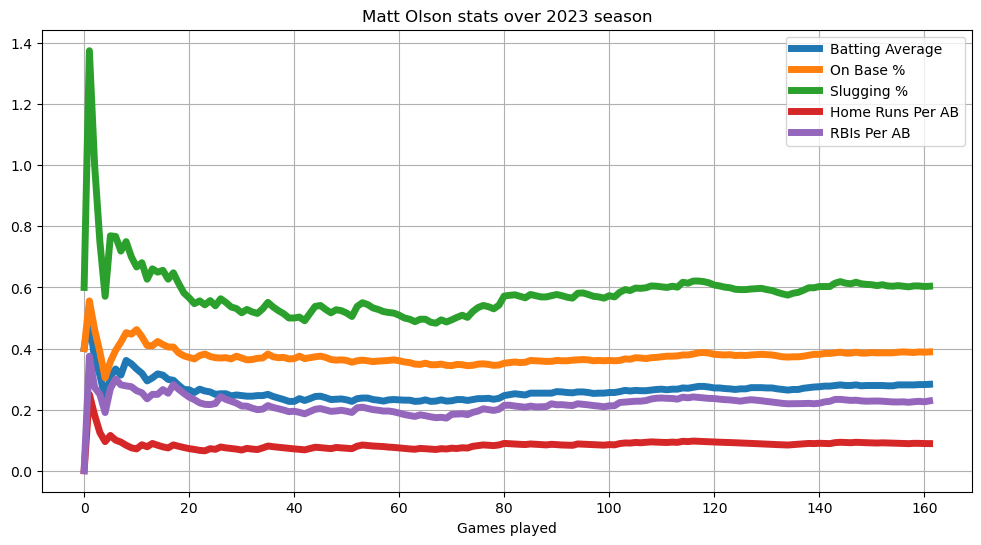

In [48]:
player_name = "Matt Olson"
player_stats = r.get_player(player_name).stats[1:].copy().rename(columns=rename_dict)[:162]
player_stats.reset_index()[relevant_stats_renamed].plot(
    title=f"{player_name} stats over 2023 season",
    xlabel="Games played",
    grid=True,
    lw=5,
)

100%|██████████████████████████| 683/683 [00:00<00:00, 1741.83it/s]


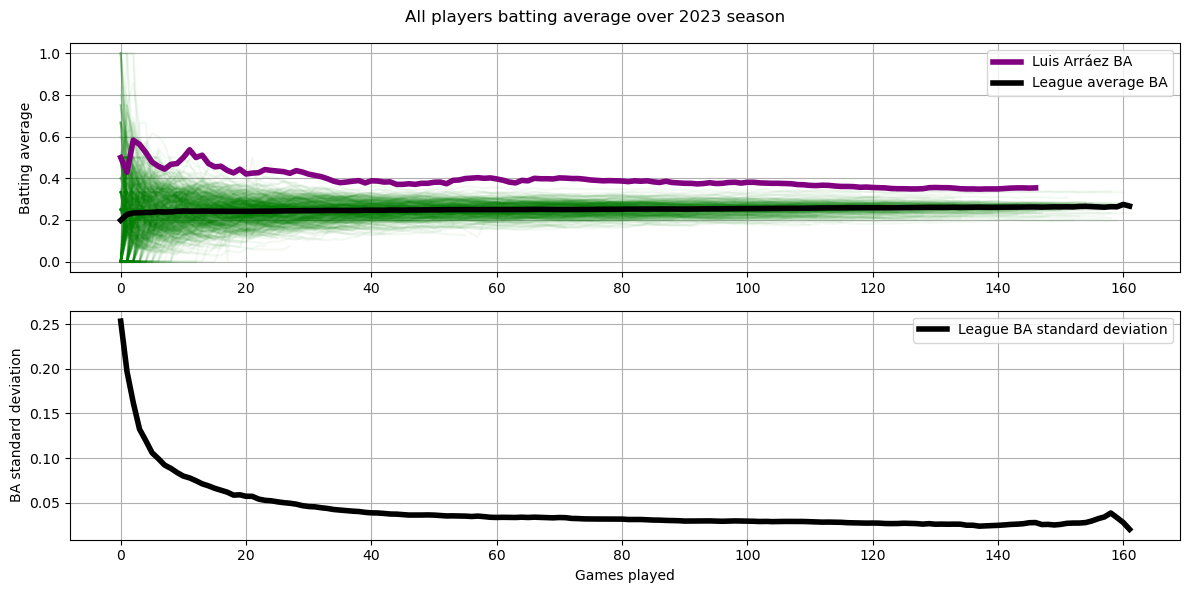

In [53]:
ax = None
stat = "Batting Average"
stat_short = "BA"
max_games = 1000
max_display_games = 200
players = r.get_player_list()
labeled_players = ["Luis Arráez"]
all_stats_array = np.empty((len(players), max_games))

for i, player_name in tqdm.tqdm(enumerate(players), total=len(players)):
    stats = np.array(r.get_player(player_name).stats[[stat]][1:].transpose()).flatten()
    all_stats_array[i, :len(stats)] = stats
    all_stats_array[i, len(stats):] = np.nan

fig, (ax1, ax2) = plt.subplots(2, 1)

for row in all_stats_array:
    ax1.plot(row[:max_display_games], color="green", alpha=0.05)

colors = ["purple", "red"]
for i, player_name in enumerate(labeled_players):
    stats = np.array(r.get_player(player_name).stats[[stat]][1:].transpose()).flatten()
    ax1.plot(stats[:max_display_games], color=colors[i], lw=4, label=f"{player_name} {stat_short}")

average, std = [], []
for i in range(all_stats_array.shape[1]):
    col_stats_no_nan = all_stats_array[:, i][~np.isnan(all_stats_array[:, i])]
    if len(col_stats_no_nan) == 0:
        continue
    average.append(np.mean(col_stats_no_nan))
    std.append(np.std(col_stats_no_nan))
ax1.plot(average[:max_display_games], color="black", lw=4, label=f"League average {stat_short}")
ax2.plot(std[:max_display_games], color="black", lw=4, label=f"League {stat_short} standard deviation")

fig.suptitle(f"All players {stat.lower()} over 2023 season")
ax1.set_ylabel(stat.upper()[0] + stat.lower()[1:])
ax2.set_ylabel(stat_short + " standard deviation")
ax2.set_xlabel("Games played")
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

## Create train/val/test data

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
TRAIN_PERC, VAL_PERC, TEST_PERC = 0.7, 0.1, 0.2
NUM_GAMES_THRESHOLD = 20

In [61]:
def get_game_data_array(game_id, num_games_threshold):
    X, y = [], []
    game = r.get_game(game_id)
    game_hitters = game.get_hitters()
    if game_hitters is None:
        return None, None
    for hitter_name in game_hitters:
        hitter = r.get_player(hitter_name)
        hitting_stats = hitter.get_stats_before_game(game_id, num_games_threshold=num_games_threshold)
        if hitting_stats is None or len(hitting_stats) == 0:
            continue
        X.append(list(hitting_stats[RELEVANT_STATS].values))
        y.append(int(hitter.did_hit_home_run(game_id)))
    if len(X) == 0:
        return None, None
    return X, y

In [64]:
raw_X, raw_y = [], []
season = 2023
for game_id in tqdm.tqdm(r.get_games()):
    game_X, game_y = get_game_data_array(game_id, NUM_GAMES_THRESHOLD)
    if game_X is None:
        continue
    for x, y in zip(game_X, game_y):
        raw_X.append(x)
        raw_y.append(y)

100%|██████████████████████████| 4860/4860 [01:27<00:00, 55.76it/s]


In [65]:
# Remove detail column from X
def modify(X_data, y_data):
    return np.array(X_data).astype(float), np.array(y_data).astype(int)
X, y = modify(raw_X, raw_y)
X.shape, y.shape

((85964, 6), (85964,))

In [66]:
i = 4
for i in range(len(RELEVANT_STATS)):
    print(RELEVANT_STATS[i])
    stat_for_hr = X[np.argwhere(y == 1)[:, 0]][:, i]
    stat_for_no_hr = X[np.argwhere(y == 0)[:, 0]][:, i]
    print(round(np.mean(stat_for_hr), 3), round(np.mean(stat_for_no_hr), 3),
          f"{round(100 * np.abs(np.mean(stat_for_hr) - np.mean(stat_for_no_hr)) / np.mean(stat_for_no_hr), 2)}%")

Batting Average
0.249 0.246 1.27%
On-Base%
0.322 0.317 1.88%
Slugging %
0.429 0.401 6.87%
Average Home Runs
0.041 0.033 24.6%
Average Runs Batted In
0.138 0.125 10.21%
At Bats Per Game
3.369 3.216 4.74%


In [132]:
# Split normally
np.random.seed(42)
X, y = modify(raw_X, raw_y)
y = y.reshape(-1, 1)
all_data = np.hstack([X, y])
np.random.shuffle(all_data)

n_t, n_v = int(len(all_data) * TRAIN_PERC), int(len(all_data) * (TRAIN_PERC + VAL_PERC))
n = len(RELEVANT_STATS)
X_train, y_train, X_val, y_val, X_test, y_test = all_data[:n_t][:, :n],\
                                                 all_data[:n_t][:, n],\
                                                 all_data[n_t:n_v][:, :n],\
                                                 all_data[n_t:n_v][:, n],\
                                                 all_data[n_v:][:, :n],\
                                                 all_data[n_v:][:, n]                
assert(len(X_train) + len(X_val) + len(X_test) == len(all_data))

# Normalize
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print(len(X_train), len(X_val), len(X_test))

60174 8597 17193


In [133]:
RELEVANT_STATS

['Batting Average',
 'On-Base%',
 'Slugging %',
 'Average Home Runs',
 'Average Runs Batted In',
 'At Bats Per Game']

In [134]:
X_train.shape, X_val.shape, X_test.shape

((60174, 6), (8597, 6), (17193, 6))

In [135]:
# # Split by games
# np.random.seed(42)
# all_games = r.get_games()
# np.random.shuffle(all_games)
# n_t, n_v = int(len(all_games) * TRAIN_PERC), int(len(all_games) * (TRAIN_PERC + VAL_PERC))
# train_games, val_games, test_games = all_games[:n_t], all_games[n_t:n_v], all_games[n_v:]
# assert(len(train_games) + len(val_games) + len(test_games) == len(all_games))

# X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []
# tups = [
#         (train_games, X_train, y_train),
#         (val_games, X_val, y_val),
#         (test_games, X_test, y_test)
#         ]
# for (games, train_data, test_data) in tups:
#     for game_id in tqdm.tqdm(games):
#         game_X, game_y = get_game_data_array(game_id, NUM_GAMES_THRESHOLD)
#         if game_X is None:
#             continue
#         for x, y in zip(game_X, game_y):
#             train_data.append(x)
#             test_data.append(y)
# X_train, y_train = modify(X_train, y_train)
# X_val, y_val = modify(X_val, y_val)
# X_test, y_test = modify(X_test, y_test)

## Train model

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

## Evaluate model

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 

In [139]:
RELEVANT_STATS

['Batting Average',
 'On-Base%',
 'Slugging %',
 'Average Home Runs',
 'Average Runs Batted In',
 'At Bats Per Game']

In [140]:
clf.coef_

array([[-0.37157286,  0.14384204,  0.28747753,  0.09058655, -0.00902488,
         0.28915396]])

In [150]:
X_data, y_data = X_train, y_train 
# y_pred = clf.predict(X_data)
y_probs = clf.predict_proba(X_data)[:, 1]

In [197]:
threshold = np.mean(y_probs)
y_pred = y_probs > threshold
np.sum(y_pred), np.sum(y_data)

(28717, 6457.0)

In [174]:
# y_pred = np.random.choice([0, 1], size=(len(y_pred),))
# y_probs = y_pred
# y_pred = np.zeros((len(y_pred),))
# y_probs = y_pred

In [198]:
# Binary evaluation
cm = confusion_matrix(y_data, y_pred) 
accuracy = accuracy_score(y_data, y_pred) 
precision = precision_score(y_data, y_pred) 
recall = recall_score(y_data, y_pred) 
f1 = f1_score(y_data, y_pred) 
fpr, tpr, thresholds = roc_curve(y_data, y_probs) 
roc_auc = auc(fpr, tpr) 
  
print("Confusion Matrix:")
print(cm)
print(cm/sum(cm))
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
[[29080 24637]
 [ 2377  4080]]
[[0.92443653 0.85792388]
 [0.07556347 0.14207612]]
Accuracy: 0.5510685678199887
Precision: 0.14207612215760698
Recall: 0.6318723865572247
F1-Score: 0.23198953772672995
ROC AUC: 0.6169494616139836


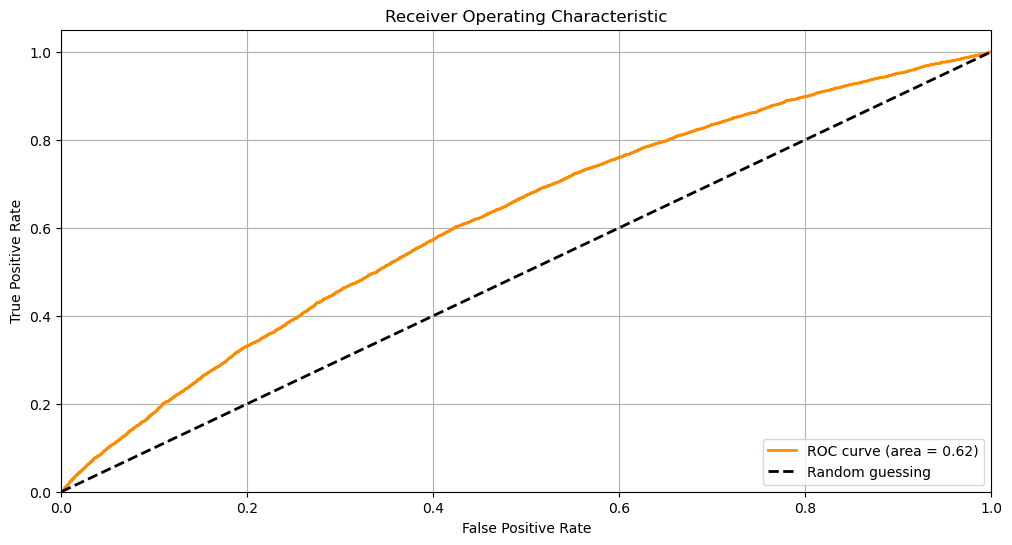

In [176]:
fpr, tpr, thresholds = roc_curve(y_data, y_probs) 
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc) 

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random guessing') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc='lower right')
plt.grid()
plt.show() 

In [177]:
# Probability buckets evaluation
# n_bins = 200
# bin_width = 1 / n_bins
# bin_boundaries = np.linspace(0, 1, n_bins + 1)
# min_n = 5

# pred_bin_probs, bin_probs = [], []
# for i_bin in range(n_bins - 1):
#     a = bin_boundaries[i_bin]
#     b = bin_boundaries[i_bin + 1]
#     n = np.sum((y_probs > a) & (y_probs < b))
#     if n < min_n:
#         continue
#     else:
#         x = np.sum(y_data*((y_probs > a) & (y_probs < b))) / n
#     pred_bin_probs.append(x)
#     bin_probs.append((a + b) / 2)

In [178]:
# outlier_threshold = 0.3

y_data_sorted = np.array([x for _, x in sorted(zip(y_probs, y_data))])
y_probs_sorted = np.array(sorted(y_probs))

# cutoff_index = 23000# list(y_probs_sorted).index(y_probs_sorted[y_probs_sorted > outlier_threshold][0])
# y_data_sorted = y_data_sorted[:cutoff_index]
# y_probs_sorted = y_probs_sorted[:cutoff_index]

n_elems_per_bin = 2000
n_bins = int(len(y_probs_sorted) / n_elems_per_bin)
data_bins, probs_bins = [], []
print(f"{n_bins} bins")
for i_bin in range(n_bins):
    if i_bin + n_elems_per_bin >= len(y_probs):
        data_bins.append(y_data_sorted[i_bin * n_elems_per_bin :])
        probs_bins.append(y_probs_sorted[i_bin * n_elems_per_bin :])
    else:
        data_bins.append(y_data_sorted[i_bin * n_elems_per_bin : (i_bin + 1) * n_elems_per_bin])
        probs_bins.append(y_probs_sorted[i_bin * n_elems_per_bin : (i_bin + 1) * n_elems_per_bin])

y_probs_bin_means = [np.mean(x) for x in probs_bins]
y_data_bin_means = [np.mean(x) for x in data_bins]

30 bins


In [179]:
errors = (np.array(probs_bins) - np.array(y_data_bin_means).reshape(-1, 1)).flatten()
np.mean(np.abs(errors))  # Average error

0.009007166962130022

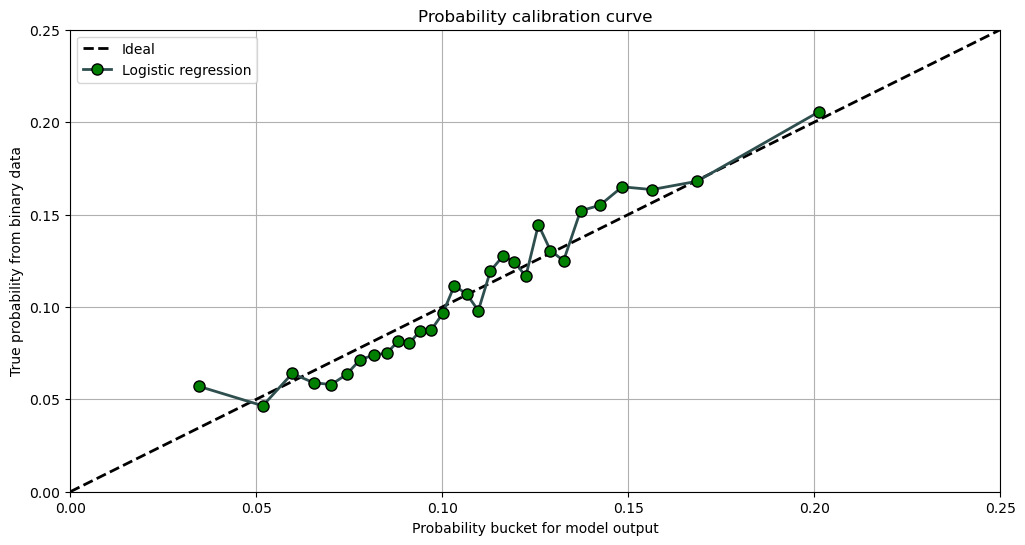

In [180]:
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='dashed', label='Ideal')
plt.plot(y_probs_bin_means, y_data_bin_means, "-o", lw=2, label="Logistic regression", markerfacecolor="green",
         color="darkslategray", alpha=1, markeredgewidth=1, markeredgecolor="black", markersize=8)

plt.title("Probability calibration curve")
plt.xlabel("Probability bucket for model output")
plt.ylabel("True probability from binary data")
plt.legend()
plt.xlim(0, 0.25)
plt.ylim(0, 0.25)
plt.grid()
plt.show()

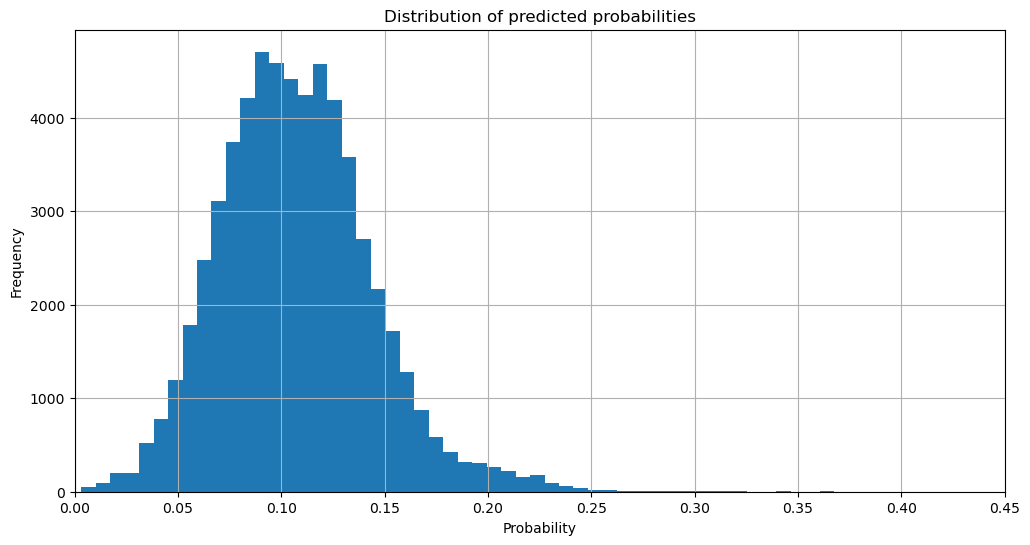

In [181]:
plt.hist(y_probs, bins=100)
plt.title("Distribution of predicted probabilities")
plt.ylabel("Frequency")
plt.xlabel("Probability")
plt.xlim(0, 0.45)
plt.grid()
plt.show()

In [182]:
y_probs[y_data == 0]

array([0.08969657, 0.06181186, 0.08289445, ..., 0.09182813, 0.10934063,
       0.07057378])

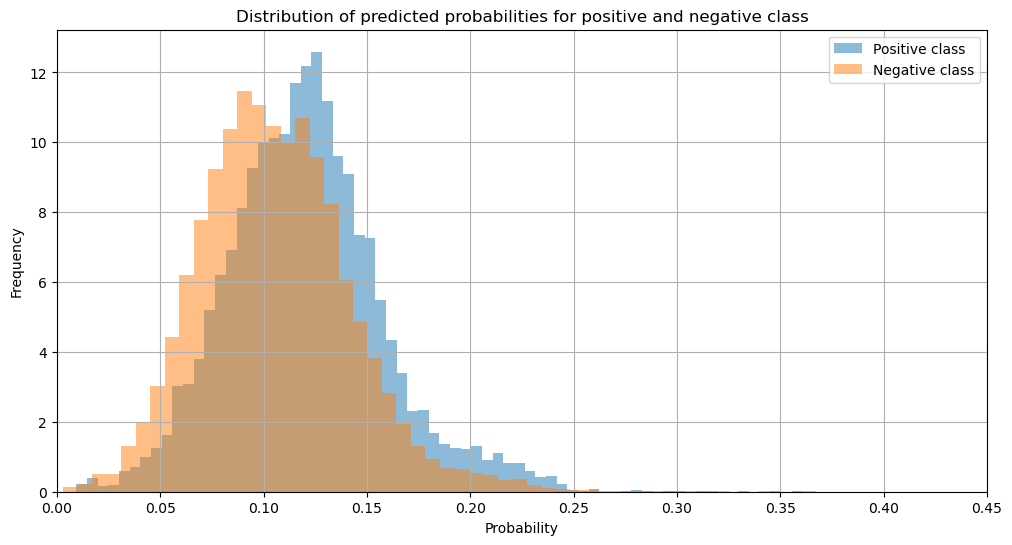

In [183]:
plt.hist(y_probs[y_data == 1], bins=100, label="Positive class", alpha=0.5, density=True)
plt.hist(y_probs[y_data == 0], bins=100, label="Negative class", alpha=0.5, density=True)
plt.title("Distribution of predicted probabilities for positive and negative class")
plt.ylabel("Frequency")
plt.xlabel("Probability")
plt.xlim(0, 0.45)
plt.legend()
plt.grid()
plt.show()

### Feature importance

In [187]:
RELEVANT_STATS

['Batting Average',
 'On-Base%',
 'Slugging %',
 'Average Home Runs',
 'Average Runs Batted In',
 'At Bats Per Game']

In [189]:
clf.coef_, clf.intercept_

(array([[-0.37157286,  0.14384204,  0.28747753,  0.09058655, -0.00902488,
          0.28915396]]),
 array([-2.18397882]))

In [224]:
relevant_stats = RELEVANT_STATS
for i in range(len(RELEVANT_STATS)):
    r = list(range(len(RELEVANT_STATS)))
    mask = np.array(r[:i] + r[i+1:])
    print(np.array(RELEVANT_STATS)[mask])
    print(RELEVANT_STATS[i], "missing")

    print("Training model")
    x = X_train[:, mask].copy()
    y = y_train.copy()
    print(x[0])
    missingmodel = LogisticRegression(random_state=42).fit(x, y)
    
    y_probs = missingmodel.predict_proba(x)[:, 1]
    threshold = np.mean(y_probs)
    y_pred = y_probs > threshold
    
    # Binary evaluation
    cm = confusion_matrix(y_data, y_pred) 
    accuracy = accuracy_score(y_data, y_pred) 
    precision = precision_score(y_data, y_pred) 
    recall = recall_score(y_data, y_pred) 
    f1 = f1_score(y_data, y_pred) 
    fpr, tpr, thresholds = roc_curve(y_data, y_probs) 
    roc_auc = auc(fpr, tpr) 

    print("Confusion Matrix:")
    print(cm)
    print(cm/sum(cm))
    print("Accuracy:", accuracy) 
    print("Precision:", precision) 
    print("Recall:", recall) 
    print("F1-Score:", f1) 
    print("ROC AUC:", roc_auc) 

    print()

['On-Base%' 'Slugging %' 'Average Home Runs' 'Average Runs Batted In'
 'At Bats Per Game']
Batting Average missing
Training model
[ 0.34965432  0.31640794 -0.08502172  0.53949436 -0.049309  ]
Confusion Matrix:
[[29123 24594]
 [ 2408  4049]]
[[0.92363071 0.85863911]
 [0.07636929 0.14136089]]
Accuracy: 0.551267989497125
Precision: 0.14136089096812485
Recall: 0.6270713953848537
F1-Score: 0.23071225071225068
ROC AUC: 0.6128210033811409

['Batting Average' 'Slugging %' 'Average Home Runs'
 'Average Runs Batted In' 'At Bats Per Game']
On-Base% missing
Training model
[ 0.66687631  0.31640794 -0.08502172  0.53949436 -0.049309  ]
Confusion Matrix:
[[28937 24780]
 [ 2375  4082]]
[[0.92415049 0.85856836]
 [0.07584951 0.14143164]]
Accuracy: 0.5487253631136371
Precision: 0.14143164021897303
Recall: 0.6321821279231842
F1-Score: 0.23115037232084712
ROC AUC: 0.6156604803896168

['Batting Average' 'On-Base%' 'Average Home Runs' 'Average Runs Batted In'
 'At Bats Per Game']
Slugging % missing
Training m

### Save model

In [190]:
model_path = "./models/logistic_regression_2023.p"
with open(model_path, "wb") as f:
    pickle.dump(clf, f)

scaler_path = "./models/logistic_regression_2023_scaler.p"
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

## Run inference

In [127]:
RELEVANT_STATS

['Batting Average',
 'On-Base%',
 'Slugging %',
 'Average Home Runs',
 'Average Runs Batted In',
 'At Bats Per Game']

In [128]:
with open(model_path, "rb") as f:
    model = pickle.load(f)
with open(scaler_path, "rb") as f:
    scaler = pickle.load(f)

In [129]:
r.get_game(r.get_games()[0]).date.day

30

In [130]:
a = scaler.transform(np.array([r.player_map.get_player("Aaron Judge").stats.iloc[-1][RELEVANT_STATS]]))
model.predict_proba(a)[0][1]

0.16398969784684336

In [131]:
a = scaler.transform(np.array([r.player_map.get_player("Jake Cave").stats.iloc[-1][RELEVANT_STATS]]))
model.predict_proba(a)[0][1]

0.02733767086947853

In [132]:
items = []
for game_id in tqdm.tqdm(r.get_games()):
    game = r.get_game(game_id)
    if game.date.year != 2024 or game.date.month != 4 or game.date.day < 10:
        continue
    for player_name in game.get_hitters():
        stats = r.player_map.get_player(player_name).get_stats_before_game(game_id)
        if stats is None:
            continue
        input_data = scaler.transform([np.array(stats[RELEVANT_STATS]).astype(np.float)])
        predicted_prob = model.predict_proba(input_data)[0][1]
        did_hit_home_run = r.player_map.get_player(player_name).did_hit_home_run(game_id)
        if did_hit_home_run is None:
            c = 2
        elif did_hit_home_run:
            c = 1
        else:
            c = 0
        item = {
            "player_name": player_name,
            "date": game.date.strftime("%Y-%m-%d"),
            "model": "logistic_regression",
            "home_run_odds": predicted_prob,
            "did_hit_hr": c,
            "stats": dict(stats),
        }

        items.append(item)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2648/2648 [00:02<00:00, 972.33it/s]


In [140]:
stats.to_dict()

{'Batting Average': 0.053,
 'On-Base%': 0.28,
 'Slugging %': 0.105,
 'At Bats': 16,
 'Home Runs': 0,
 'Runs Batted In': 1,
 'Average Home Runs': 0.0,
 'Average Runs Batted In': 0.0625,
 'At Bats Per Game': 1.7777777777777777,
 'details': ''}

In [139]:
items[0]

{'player_name': 'Xander Bogaerts',
 'date': '2024-04-10',
 'model': 'logistic_regression',
 'home_run_odds': 0.0905698506945754,
 'did_hit_hr': 0,
 'stats': {'Batting Average': 0.25,
  'On-Base%': 0.3,
  'Slugging %': 0.339,
  'At Bats': 43,
  'Home Runs': 1,
  'Runs Batted In': 2,
  'Average Home Runs': 0.023255813953488372,
  'Average Runs Batted In': 0.046511627906976744,
  'At Bats Per Game': 3.5833333333333335,
  'details': '2B'}}

In [133]:
items

[{'player_name': 'Xander Bogaerts',
  'date': '2024-04-10',
  'model': 'logistic_regression',
  'home_run_odds': 0.0905698506945754,
  'did_hit_hr': 0,
  'stats': {'Batting Average': 0.25,
   'On-Base%': 0.3,
   'Slugging %': 0.339,
   'At Bats': 43,
   'Home Runs': 1,
   'Runs Batted In': 2,
   'Average Home Runs': 0.023255813953488372,
   'Average Runs Batted In': 0.046511627906976744,
   'At Bats Per Game': 3.5833333333333335,
   'details': '2B'}},
 {'player_name': 'Fernando Tatis Jr.',
  'date': '2024-04-10',
  'model': 'logistic_regression',
  'home_run_odds': 0.17549554996456704,
  'did_hit_hr': 0,
  'stats': {'Batting Average': 0.264,
   'On-Base%': 0.328,
   'Slugging %': 0.509,
   'At Bats': 41,
   'Home Runs': 4,
   'Runs Batted In': 7,
   'Average Home Runs': 0.0975609756097561,
   'Average Runs Batted In': 0.17073170731707318,
   'At Bats Per Game': 3.4166666666666665,
   'details': ''}},
 {'player_name': 'Jake Cronenworth',
  'date': '2024-04-10',
  'model': 'logistic_regr

In [141]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [144]:
data_file = "/Users/lucaspauker/projects/sports/home_run_project/sports_data_database/data/items.json"
with open(data_file, "w") as f:
    json.dump(items, f, cls=NpEncoder)